## SENTIMENT ANALYSIS Based on Supervised Learning


## Objectives

1. Train your own supervised sentiment classifier.

## Session Prep

In [25]:
#packages needed

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np 
import pandas as pd

#text normalization function
%run ./Text_Normalization_Function.ipynb

#ignore warnings about future changes in functions as they take too much space
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LiGoudan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LiGoudan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LiGoudan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LiGoudan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [79]:
# Package for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import neural_network
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

AmazonMucisInstrucment.csv

## Data Preprocess
★Use Back Translation method to augment text data to increase sample size and fix inbalance problem

In [27]:
# Import in the Augmented data 
data = pd.read_csv('Musical_instruments_reviews_Augmented.csv')
data = data.loc[:, ['reviewText', 'overall']]

# Delete Null Samples
float_ind = list()
str_ind = list()
for ind in data.index:
    if type(data.loc[ind, 'reviewText']) == float:
        float_ind.append(ind)
    elif type(data.loc[ind, 'reviewText']) == str:
        str_ind.append(ind)
    else:
        print(str(i) + ': ' + str(type(data.loc[ind, 'reviewText'])))

# Delete blank samples
data.drop(labels=None, axis=0, index=float_ind, columns=None, inplace=True)

print("Dimensions for data:", data.shape)
print("First 5 rows in dataset: \n", data.head(),"\n")

Dimensions for data: (25028, 2)
First 5 rows in dataset: 
                                           reviewText  overall
0  Not much to write about here, but it does exac...        5
1  The product does exactly as it should and is q...        5
2  The primary job of this device is to block the...        5
3  Nice windscreen protects my MXL mic and preven...        5
4  This pop filter is great. It looks and perform...        5 



### Training your Own Sentiment Classifier (Supervised Machine Learning)

Given that we have **labels** in the data, we can take advantage of them and train our own **sentiment classifier**. Let's do it and see if the performance of the custom classifier would be better than of the lexicon-based model above.

Start by vectorizing the normalized training dataset. Let's use TF-IDF approach and use a mix of **uni-grams** and **bi-grams** as features:

(array([3524.,    0., 3774.,    0.,    0., 6967.,    0., 3831.,    0.,
        6932.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

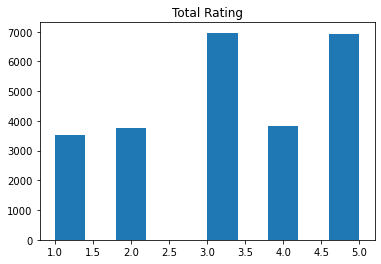

In [28]:
# Descriptive Analysis
plt.figure()
plt.title('Total Rating')
plt.hist(data['overall'])

In [34]:
# Downsample rating=5 data to make it balance
import random
ind_5 = list(data.index[data['overall'] == 5])
random.seed(0)
random.shuffle(ind_5)

data.drop(labels=None, axis=0, index=ind_5[: int(round(len(ind_5) / 3 * 1, 0))], columns=None, inplace=True)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 13, 14, 17, 18, 19, 21, 23, 24, 26, 27, 29, 30, 31, 33, 34, 38, 40, 41, 42, 43, 44, 47, 48, 49, 51, 54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 72, 75, 78, 80, 81, 82, 83, 84, 85, 86, 87, 90, 91, 92, 94, 95, 96, 99, 100, 101, 102, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 124, 125, 126, 127, 129, 130, 132, 133, 134, 135, 136, 137, 139, 140, 141, 145, 146, 147, 149, 150, 152, 153, 154, 155, 156, 158, 159, 161, 162, 163, 165, 166, 167, 168, 169, 171, 176, 182, 183, 187, 188, 191, 192, 193, 194, 195, 196, 197, 198, 201, 203, 204, 205, 209, 210, 211, 212, 213, 217, 220, 221, 226, 227, 229, 233, 235, 236, 237, 238, 239, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 260, 263, 264, 265, 267, 268, 271, 272, 273, 274, 275, 277, 278, 279, 280, 282, 284, 285, 288, 289, 290, 292, 293, 294, 296, 297, 298, 299, 301, 304, 305, 308, 309, 310, 311, 312, 314, 315, 317, 318, 319, 320, 321, 

In [35]:
ind_3 = list(data.index[data['overall'] == 3])
random.seed(1)
random.shuffle(ind_3)

data.drop(labels=None, axis=0, index=ind_3[: int(round(len(ind_3) / 3 * 1, 0))], columns=None, inplace=True)

(array([3524.,    0., 3774.,    0.,    0., 4645.,    0., 3831.,    0.,
        4621.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

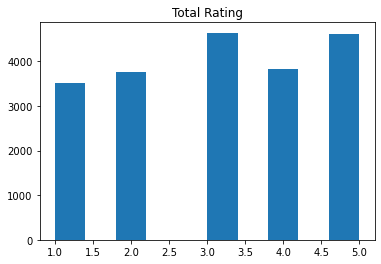

In [36]:
plt.figure()
plt.title('Total Rating')
plt.hist(data['overall'])

In [37]:
review = np.array(data['reviewText'])
rating = np.array(data['overall'])

print("First 5 rows in reviews: \n", review[:5], "\n")
print("First 5 rows in rating: \n", rating[:5], "\n")

First 5 rows in reviews: 
 ["Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"
 "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]"
 'The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no n

In [48]:
# Define k-fold validation
def k_fold_val_score(model, x, y, fold=5, seed=0):
    """
    function: calculate the performance based on k-fold cross validation score
    param-model: model class input for k-fold validation
    param-x, y: features and labels, should be np
    param-fold: number of k in k-fold cross validation
    param-seed: random seed used in split k-fold
    """
    ind = [i for i in range(len(x))]
    subset_size = len(ind) // fold
    # shuffle data
    random.seed(seed)
    random.shuffle(ind)
    cur_ind_loc = 0
    accuracy = list()
    auc_score = list()
    # get accuracy of cross-validation
    for fold_ind in range(fold):
        if fold_ind == fold - 1:
            end_ind_loc = len(ind) - 1
        else:
            end_ind_loc = cur_ind_loc + subset_size
        X_val = x[ind[cur_ind_loc: end_ind_loc]]
        y_val = y[ind[cur_ind_loc: end_ind_loc]]
        X_train = np.vstack([x[ind[0:cur_ind_loc]], x[ind[end_ind_loc:]]])
        y_train = np.hstack([y[ind[0:cur_ind_loc]], y[ind[end_ind_loc:]]])  # y.shape=(n,), so use hstack
        # train the model and predict validation
        md_instance = model
        md = md_instance.fit(X_train, y_train)
        y_pred = md.predict(X_val)
        # y_pred_prob = md.predict_proba(X_val)
        # record the accuracy and auc_score
        accuracy.append(np.mean(y_val == y_pred))
        # auc_score.append(metrics.roc_auc_score(y_val, y_pred_prob[:, 1]))

        cur_ind_loc += subset_size
    return round(np.mean(np.array(accuracy)), 3)  # round(np.mean(np.array(auc_score)), 3)

In [38]:
# Split train, validation and test dataset at a ratio of 6:2:2
from sklearn.model_selection import train_test_split

# Split train and test
review_train, review_test, rating_train, rating_test = \
train_test_split(review, rating, test_size=0.1, shuffle=True, stratify=rating, random_state=1)

18355
2040


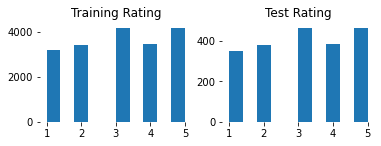

In [39]:
# Description Analysis
print(len(review_train))
print(len(review_test))

plt.figure()
ax1 = plt.subplot(2, 2, 1, frameon = False)
plt.title('Training Rating')
plt.hist(rating_train)

ax2 = plt.subplot(2, 2, 2, frameon = False)
plt.title('Test Rating')
plt.hist(rating_test)
plt.show()

## Training Supervised Model for text mining
#### *All the hyperparameters are the best according to k-fold validation grid-search. Due to length of the code, it is run on our own pannel.

In [40]:
# Tokenize the word
normalized_train_reviews = normalize_corpus(review_train)
normalized_test_reviews = normalize_corpus(review_test)

### Different algorithm to train the model based on Word Bag

In [111]:
# Word Bag
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_BOW = CountVectorizer(max_features=1000)
feature_matrix_TRAIN_BOW = vectorizer_BOW.fit_transform(normalized_train_reviews).astype(float)
feature_matrix_TEST_BOW = vectorizer_BOW.transform(normalized_test_reviews)

In [122]:
# Using poly_svc
svc_poly = SVC(C=0.8, kernel='poly', degree=1)
svc_poly.fit(feature_matrix_TRAIN_BOW, rating_train)

predicted_svc_poly = svc_poly.predict(feature_matrix_TEST_BOW) 
print('Accuracy rate:', np.round(np.mean(predicted_svc_poly == rating_test), 3))

Accuracy rate: 0.632


In [120]:
# Using rbf_svc
svc_rbf = SVC(C=1.4, kernel='rbf', gamma=0.02)
svc_rbf.fit(feature_matrix_TRAIN_BOW, rating_train)

predicted_svc_rbf = svc_rbf.predict(feature_matrix_TEST_BOW)
print('Accuracy rate:', np.round(np.mean(predicted_svc_rbf == rating_test), 3))

Accuracy rate: 0.807


In [123]:
# Using Random_Forest
forest = RandomForestClassifier(n_estimators=100, max_depth=None, oob_score=True, random_state=42)
forest.fit(feature_matrix_TRAIN_BOW, rating_train)

predicted_forest = forest.predict(feature_matrix_TEST_BOW)
print('Accuracy rate:', np.round(np.mean(predicted_forest == rating_test), 3))

Accuracy rate: 0.86


In [118]:
# Using Decision Tree
tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                min_impurity_split=None, class_weight=None)
tree.fit(feature_matrix_TRAIN_BOW, rating_train)

predicted_tree = tree.predict(feature_matrix_TEST_BOW)
print('Accuracy rate:', np.round(np.mean(predicted_tree == rating_test), 3))

Accuracy rate: 0.658


In [119]:
# Using ANN
mlp = neural_network.MLPClassifier(hidden_layer_sizes=16, activation="relu",
                                   solver='adam', alpha=0.0003,
                                   batch_size='auto', learning_rate="constant",
                                   learning_rate_init=0.001, power_t=0.5, max_iter=200, tol=1e-4)
mlp.fit(feature_matrix_TRAIN_BOW, rating_train)

predicted_mlp = mlp.predict(feature_matrix_TEST_BOW)
print('Accuracy rate:', np.round(np.mean(predicted_mlp == rating_test), 3))

Accuracy rate: 0.728


C:\Personal\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Different algorithm to train the model based on TF-IDF + UniGram

In [11]:
# TF-IDF + UniGram
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_TfUBgram = TfidfVectorizer(ngram_range = (1,1), norm = 'l2', smooth_idf = True) 
feature_matrix_TRAIN_TfUBgram = vectorizer_TfUBgram.fit_transform(normalized_train_reviews).astype(float)
feature_matrix_TEST_TfUBgram = vectorizer_TfUBgram.transform(normalized_test_reviews)

Have a look at the feature matrix with unigrams and bi-grams for the training data and note the n-grams:

In [12]:
feature_matrix_TRAIN_names = vectorizer_TfUBgram.get_feature_names() 
feature_matrix_TRAIN_table = pd.DataFrame(data = feature_matrix_TRAIN_TfUBgram.todense(), 
                                          columns = feature_matrix_TRAIN_names)
feature_matrix_TRAIN_table.head()

,000s,000s worth,008ex,008ex great,008s,008s poll,009s,009s 008s,009s long,009s might,...,zylgiane,zylgiane damn,zylgic,zylgic damn,zylgically,zylgically use,zz,zz top,zzounds,zzounds musician
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Using poly_svc
svc_poly = SVC(C=1.0, kernel='poly', degree=2)
svc_poly.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_svc_poly = svc_poly.predict(feature_matrix_TEST_TfUBgram) 
print('Accuracy rate:', np.round(np.mean(predicted_svc_poly == rating_test), 3))

Accuracy rate: 0.92


In [54]:
print(np.sum(rating_test == 1))
print(np.sum(predicted_svc_poly == 1))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 2))
print(np.sum(predicted_svc_poly == 2))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 3))
print(np.sum(predicted_svc_poly == 3))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 4))
print(np.sum(predicted_svc_poly == 4))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 5))
print(np.sum(predicted_svc_poly == 5))

352
347
----------------------------------------------------------------------------
378
377
----------------------------------------------------------------------------
465
457
----------------------------------------------------------------------------
383
312
----------------------------------------------------------------------------
462
547


In [73]:
# Using rbf_svc
svc_rbf = SVC(C=1.4, kernel='rbf', gamma=1)
svc_rbf.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_svc_rbf = svc_rbf.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_svc_rbf == rating_test), 3))

Accuracy rate: 0.89


In [74]:
print(np.sum(rating_test == 1))
print(np.sum(predicted_svc_rbf == 1))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 2))
print(np.sum(predicted_svc_rbf == 2))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 3))
print(np.sum(predicted_svc_rbf == 3))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 4))
print(np.sum(predicted_svc_rbf == 4))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 5))
print(np.sum(predicted_svc_rbf == 5))

352
350
----------------------------------------------------------------------------
378
379
----------------------------------------------------------------------------
465
474
----------------------------------------------------------------------------
383
352
----------------------------------------------------------------------------
462
485


In [76]:
# Using Random_Forest
forest = RandomForestClassifier(n_estimators=50, max_depth=None, oob_score=True, random_state=42)
forest.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_forest = forest.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_forest == rating_test), 3))

Accuracy rate: 0.871


In [77]:
print(np.sum(rating_test == 1))
print(np.sum(predicted_forest == 1))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 2))
print(np.sum(predicted_forest == 2))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 3))
print(np.sum(predicted_forest == 3))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 4))
print(np.sum(predicted_forest == 4))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 5))
print(np.sum(predicted_forest == 5))

352
349
----------------------------------------------------------------------------
378
378
----------------------------------------------------------------------------
465
505
----------------------------------------------------------------------------
383
294
----------------------------------------------------------------------------
462
514


In [82]:
# Using Decision Tree
tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                min_impurity_split=None, class_weight=None)
tree.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_tree = tree.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_tree == rating_test), 3))

Accuracy rate: 0.636


In [83]:
print(np.sum(rating_test == 1))
print(np.sum(predicted_tree == 1))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 2))
print(np.sum(predicted_tree == 2))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 3))
print(np.sum(predicted_tree == 3))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 4))
print(np.sum(predicted_tree == 4))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 5))
print(np.sum(predicted_tree == 5))

352
379
----------------------------------------------------------------------------
378
396
----------------------------------------------------------------------------
465
450
----------------------------------------------------------------------------
383
385
----------------------------------------------------------------------------
462
430


In [86]:
# Using ANN
mlp = neural_network.MLPClassifier(hidden_layer_sizes=16, activation="relu",
                                   solver='adam', alpha=0.0003,
                                   batch_size='auto', learning_rate="constant",
                                   learning_rate_init=0.001, power_t=0.5, max_iter=200, tol=1e-4)
mlp.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_mlp = mlp.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_mlp == rating_test), 3))

Accuracy rate: 0.794


In [87]:
print(np.sum(rating_test == 1))
print(np.sum(predicted_mlp == 1))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 2))
print(np.sum(predicted_mlp == 2))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 3))
print(np.sum(predicted_mlp == 3))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 4))
print(np.sum(predicted_mlp == 4))
print("----------------------------------------------------------------------------")
print(np.sum(rating_test == 5))
print(np.sum(predicted_mlp == 5))

352
348
----------------------------------------------------------------------------
378
384
----------------------------------------------------------------------------
465
471
----------------------------------------------------------------------------
383
408
----------------------------------------------------------------------------
462
429


### Different algorithm to train the model based on TF-IDF + (Uni + Bi)Gram

In [88]:
# TF-IDF + (Uni + Bi)Gram
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_TfUBgram = TfidfVectorizer(ngram_range = (1,2), norm = 'l2', smooth_idf = True) 
feature_matrix_TRAIN_TfUBgram = vectorizer_TfUBgram.fit_transform(normalized_train_reviews).astype(float)
feature_matrix_TEST_TfUBgram = vectorizer_TfUBgram.transform(normalized_test_reviews)

In [89]:
# Using poly_svc
svc_poly = SVC(C=1.0, kernel='poly', degree=2)
svc_poly.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_svc_poly = svc_poly.predict(feature_matrix_TEST_TfUBgram) 
print('Accuracy rate:', np.round(np.mean(predicted_svc_poly == rating_test), 3))

Accuracy rate: 0.916


In [90]:
# Using rbf_svc
svc_rbf = SVC(C=1.4, kernel='rbf', gamma=1)
svc_rbf.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_svc_rbf = svc_rbf.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_svc_rbf == rating_test), 3))

Accuracy rate: 0.903


In [91]:
# Using Random_Forest
forest = RandomForestClassifier(n_estimators=50, max_depth=None, oob_score=True, random_state=42)
forest.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_forest = forest.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_forest == rating_test), 3))

Accuracy rate: 0.874


In [92]:
# Using Decision Tree
tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                min_impurity_split=None, class_weight=None)
tree.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_tree = tree.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_tree == rating_test), 3))

Accuracy rate: 0.64


In [93]:
# Using ANN
mlp = neural_network.MLPClassifier(hidden_layer_sizes=16, activation="relu",
                                   solver='adam', alpha=0.0003,
                                   batch_size='auto', learning_rate="constant",
                                   learning_rate_init=0.001, power_t=0.5, max_iter=200, tol=1e-4)
mlp.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_mlp = mlp.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_mlp == rating_test), 3))

Accuracy rate: 0.902


### Different algorithm to train the model based on TF-IDF + BiGram

In [94]:
# TF-IDF + BiGram
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_TfUBgram = TfidfVectorizer(ngram_range = (2,2), norm = 'l2', smooth_idf = True) 
feature_matrix_TRAIN_TfUBgram = vectorizer_TfUBgram.fit_transform(normalized_train_reviews).astype(float)
feature_matrix_TEST_TfUBgram = vectorizer_TfUBgram.transform(normalized_test_reviews)

In [95]:
# Using poly_svc
svc_poly = SVC(C=1.0, kernel='poly', degree=2)
svc_poly.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_svc_poly = svc_poly.predict(feature_matrix_TEST_TfUBgram) 
print('Accuracy rate:', np.round(np.mean(predicted_svc_poly == rating_test), 3))

Accuracy rate: 0.88


In [96]:
# Using rbf_svc
svc_rbf = SVC(C=1.4, kernel='rbf', gamma=1)
svc_rbf.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_svc_rbf = svc_rbf.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_svc_rbf == rating_test), 3))

Accuracy rate: 0.91


In [106]:
# Using Random_Forest
forest = RandomForestClassifier(n_estimators=50, max_depth=None, oob_score=True, random_state=42)
forest.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_forest = forest.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_forest == rating_test), 3))

Accuracy rate: 0.773


In [103]:
# Using Decision Tree
tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                min_impurity_split=None, class_weight=None)
tree.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_tree = tree.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_tree == rating_test), 3))

Accuracy rate: 0.656


In [99]:
# Using ANN
mlp = neural_network.MLPClassifier(hidden_layer_sizes=16, activation="relu",
                                   solver='adam', alpha=0.0003,
                                   batch_size='auto', learning_rate="constant",
                                   learning_rate_init=0.001, power_t=0.5, max_iter=200, tol=1e-4)
mlp.fit(feature_matrix_TRAIN_TfUBgram, rating_train)

predicted_mlp = mlp.predict(feature_matrix_TEST_TfUBgram)
print('Accuracy rate:', np.round(np.mean(predicted_mlp == rating_test), 3))

Accuracy rate: 0.899


### Performance Between Algorithms
According to the result of previous model, create dataFrame recording token method, classifier and corresponding accuracy

In [132]:
# Create the accuracy data frame
accuracy = pd.DataFrame({'Poly SVC': [0.632, 0.920, 0.916, 0.88],
                         'Rbf SVC': [0.807, 0.890, 0.903, 0.910],
                         'Random Forest': [0.860, 0.871, 0.874, 0.773],
                         'Decision Tree': [0.658, 0.636, 0.64, 0.656],
                         'ANN': [0.728, 0.794, 0.902, 0.899]}, 
                         index = ['Word Bag', 'TF-IDF UniGram', 'TF-IDF Uni+BiGram', 'TF-IDF BiGram'])

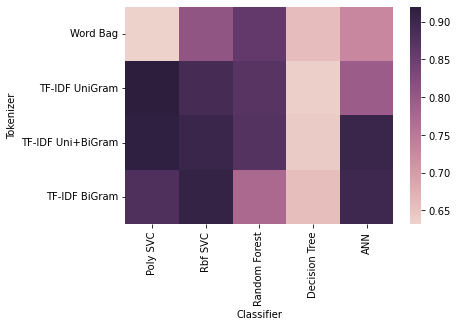

In [133]:
plt.figure()
sns.heatmap(data=accuracy, cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel('Classifier')
plt.ylabel('Tokenizer')
plt.show()